# Analisis exploratorio de datos (EDA)

En este analisis vamos a ver:
- Que distribución hay según el tipo de alquiler y el grupo de barrio (habitación privada, habitación compartida o  apart. entero).
- Que media de noche se alquila según el grupo de barrio (larga estancia o corta estancia).
- Que rangos de precio por noche se maneja según el grupo de barrio.
- Que precio hay según el tipo de habitación.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest



> ### Pasos a seguir para una EDA.
>1º Acceder al csv.
>
>2º Convertirlo en dataframe df
>
>3º Solicitar toda la info
>
>4º Buscar duplicados y eliminarlos
>
>5º Limpiar datos innecesarios
>
>6º Analisis descriptivo
>
>7º Ingeniería de características.
>
>8º Split (dos metodos o enfoques).
>
>9º Scaling y Encoding.





## 1º y 2º Acceder al csv y convertirlo en dataframe (df_airbnb)


In [2]:
df_airbnb = pd.read_csv('/workspaces/sarayruiz---Machine-Learning/data/raw/internal-link.csv', sep=',')
df_airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


## 3º Solicitar toda la info

In [3]:
df_airbnb.shape


(48895, 16)

In [4]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df_airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [6]:
price_cero = (df_airbnb['price'] == 0).sum()

f"La columna 'price' tiene {price_cero} valores cero."

"La columna 'price' tiene 11 valores cero."

In [7]:
availability_cero = (df_airbnb['availability_365'] == 0).sum()

f"La columna 'availability_365' tiene {availability_cero} valores cero."

"La columna 'availability_365' tiene 17533 valores cero."

>### Observaciones:
>
> - Tenemos 48895 Filas y 16 Columnas a analizar.
> - Algunos de las filas contiene datos vacíos. 
> - Ya que observamos que columnas como last_review o reviews_per_month tiene menos datos.
> - Los datos cuentan con 10 características númericas y 6 característica categóricas.
> - Observamos que tenemos en precio un min de 0 por lo que nos da a entender que esa vivienda no se alquila. También nos sucede con la disponibilidad, si una vivienda no tiene dias disponible para alquilar, es que no la alquila y tiene el anuncio deshabilitado. Por lo que la eliminaremos más adelante.

## 4º Buscar duplicados y eliminarlos

In [8]:
df_airbnb.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [9]:
df_airbnb.drop("id", axis=1).duplicated().sum()

np.int64(0)

## 5º Limpiar datos innecesarios

In [10]:
# Vemos en primer lugar que barrios tenemos con que nº de datos. 
df_airbnb['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [11]:
# Paso los barrios a datos numericos para que puedan ser luego analizados.
df_airbnb['number_barrio'] = pd.factorize(df_airbnb['neighbourhood_group'])[0]
df_airbnb['number_barrio'].value_counts()

number_barrio
1    21661
0    20104
2     5666
4     1091
3      373
Name: count, dtype: int64

In [12]:
# Igualmente vemos que tipos de habitaciones tenemos con que nº de datos. 
df_airbnb['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [13]:
# Paso los tipos de habitaciones a  datos numericos para que puedan ser luego analizados.
df_airbnb['number_tipohab'] = pd.factorize(df_airbnb['room_type'])[0]
df_airbnb['number_tipohab'].value_counts()


number_tipohab
1    25409
0    22326
2     1160
Name: count, dtype: int64

In [14]:
# Creamos un json donde ver que número se le ha dado al barrio.
airbnb_transformation_rulesbarrio = {row['neighbourhood_group']: row['number_barrio'] for _, row in df_airbnb.iterrows()}
airbnb_transformation_rulesbarrio


{'Brooklyn': 0, 'Manhattan': 1, 'Queens': 2, 'Staten Island': 3, 'Bronx': 4}

In [15]:
with open('../data/processed/airbnb-transformation-rulesbarrio.json', 'w') as file:
    json.dump(airbnb_transformation_rulesbarrio, file)


In [16]:
# Creamos un json donde ver que número se le ha dado a los tipos de habitación.
airbnb_transformation_ruleshab = {row['room_type']: row['number_tipohab'] for _, row in df_airbnb.iterrows()}
airbnb_transformation_ruleshab

{'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2}

In [17]:
with open('../data/processed/airbnb-transformation-ruleshab.json', 'w') as file:
    json.dump(airbnb_transformation_ruleshab, file)

In [18]:
df = df_airbnb.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type',  'number_of_reviews', 'last_review', 
                    'reviews_per_month', 'calculated_host_listings_count'], axis=1)
df


,price,minimum_nights,availability_365,number_barrio,number_tipohab
0,149,1,365,0,0
1,225,1,355,1,1
2,150,3,365,1,0
3,89,1,194,0,1
4,80,10,0,1,1
...,...,...,...,...,...
48890,70,2,9,0,0
48891,40,4,36,0,0
48892,115,10,27,1,1
48893,55,1,2,1,2


> ### Eliminamos filas a 0 del precio y de los días disponible:
> Ya que si el precio de la noche es a 0€, es que no lo está alquilando así como los que no tienen disponibilidad, si no tienes días habilitados es que tiene un anuncio subido
> pero inhabilitado para alquilar. Por lo que estos datos no nos validos para un análisis.

In [19]:
df.drop(index=df.index[df["price"].eq(0)], inplace=True) 
df["price"]

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48884, dtype: int64

In [20]:
df.drop(index=df.index[df['availability_365'].eq(0)], inplace=True)
df['availability_365']

0        365
1        355
2        365
3        194
5        129
        ... 
48890      9
48891     36
48892     27
48893      2
48894     23
Name: availability_365, Length: 31354, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31354 entries, 0 to 48894
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             31354 non-null  int64
 1   minimum_nights    31354 non-null  int64
 2   availability_365  31354 non-null  int64
 3   number_barrio     31354 non-null  int64
 4   number_tipohab    31354 non-null  int64
dtypes: int64(5)
memory usage: 1.4 MB


## 6º Analisis descriptivo

> ### Vamos a analizar la distribución de los tipos de alojamiento (habitación privada, compartida o apartamento completo) en función de cada grupo de barrio.


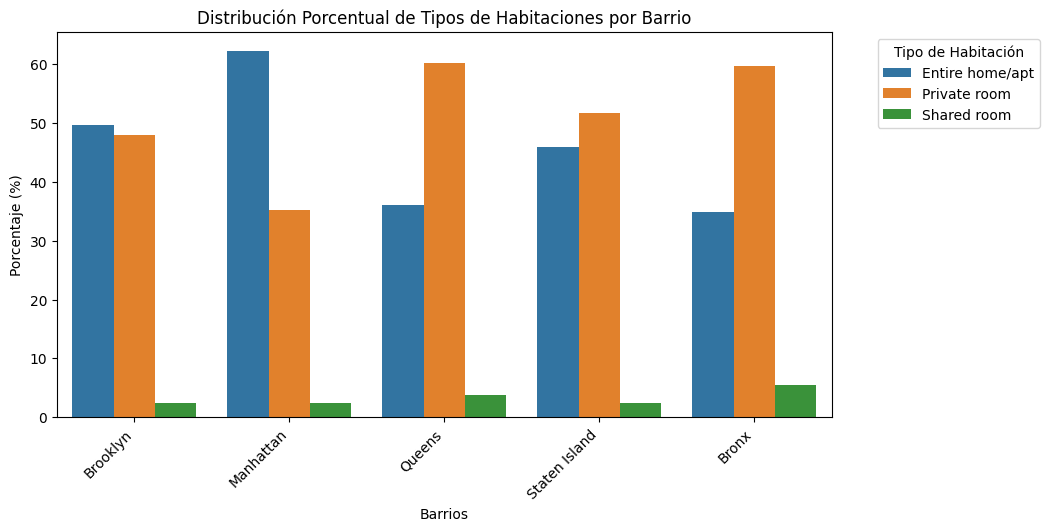

In [22]:
mapa_barrios = {0: "Brooklyn", 1: "Manhattan", 2: "Queens", 3: "Staten Island", 4: "Bronx"}
mapa_habitaciones = {0: "Private room", 1: "Entire home/apt", 2: "Shared room"}

data_grafico = (df.groupby('number_barrio')['number_tipohab'].value_counts(normalize=True).mul(100)
                 .rename('porcentaje').reset_index())

data_grafico['nombre_barrio'] = data_grafico['number_barrio'].map(mapa_barrios)
data_grafico['nombre_habitacion'] = data_grafico['number_tipohab'].map(mapa_habitaciones)

plt.figure(figsize=(10, 5))
sns.barplot(x='nombre_barrio', y='porcentaje', hue='nombre_habitacion', data=data_grafico)
plt.title('Distribución Porcentual de Tipos de Habitaciones por Barrio')
plt.xlabel('Barrios')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Habitación', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

> Observaciones:
> 1. Equilibrio y Paridad (Brooklyn) :
> Brooklyn presenta una paridad en la oferta de alojamientos, con una distribución porcentual casi equilibrada entre los apartamentos completos (Entire home/apt) y las habitaciones privadas (Private room).
>
> 2. Dominancia (Manhattan):
> En Manhattan, la oferta está claramente dominada por los apartamentos completos, siendo estos la modalidad de alquiler más abundante.
>
> 3. Tendencia Mayoritaria (Queens, Staten Island y Bronx):
> La tendencia mayoritaria en Queens, Staten Island y Bronx se inclina hacia las habitaciones privadas, constituyendo estas la opción de alojamiento predominante en estos barrios.


> ### Procederemos a examinar la media de las noches mínimas de estancia segmentada por grupo de barrio.

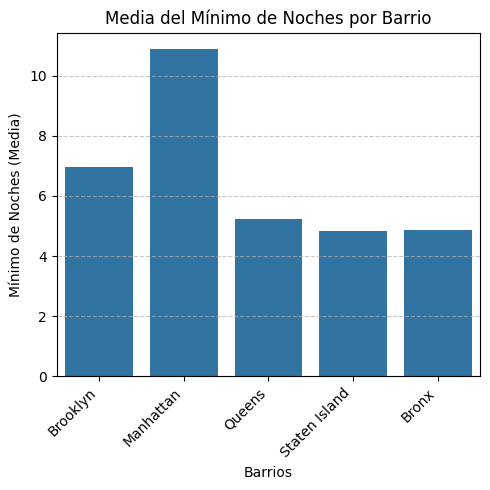

In [23]:
df['nombre_barrio'] = df['number_barrio'].map(mapa_barrios)

plt.figure(figsize=(5, 5))

sns.barplot(data=df, x='nombre_barrio', y='minimum_nights', errorbar=None)

plt.title('Media del Mínimo de Noches por Barrio')
plt.xlabel('Barrios')
plt.ylabel('Mínimo de Noches (Media)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()



> Observaciones:
>
> Se observa una uniformidad en la media de las noches mínimas de estancia en la mayoría de los barrios, 
> con la excepción notable de Manhattan, que presenta un promedio significativamente superior.

> ### Determinaremos los rangos de precios predominantes de la oferta de alojamientos en cada grupo de barrio.

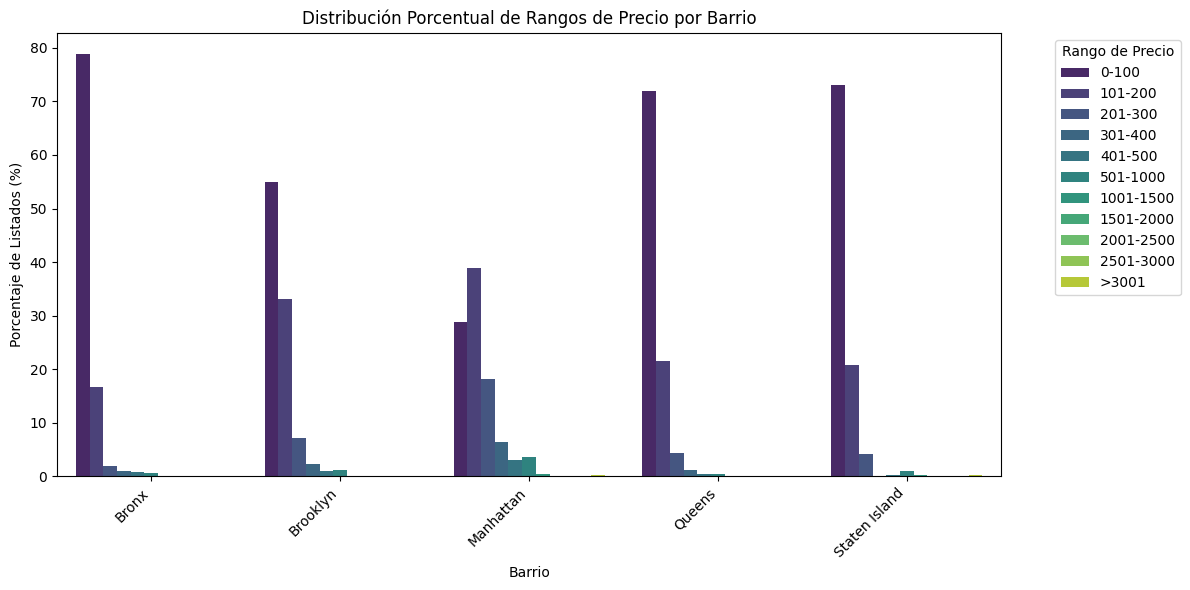

In [24]:
bins = [0, 100, 200, 300, 400, 500, 1000, 1500, 2000, 2500, 3000, 15000]

labels = ['0-100','101-200', '201-300', '301-400', '401-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '>3001']

df['rango_precio'] = pd.cut(df['price'], bins=bins, labels=labels, right=True, include_lowest=True)

data_rango_proporcion = (df.groupby('nombre_barrio')['rango_precio'].value_counts(normalize=True).mul(100).rename('porcentaje').reset_index())

plt.figure(figsize=(12, 6))

sns.barplot(data=data_rango_proporcion, x='nombre_barrio', y='porcentaje', hue='rango_precio', palette='viridis')

plt.title('Distribución Porcentual de Rangos de Precio por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Porcentaje de Listados (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Rango de Precio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> Observaciones:
> 
> Se identifica una clara tendencia dominante donde la mayoría de los barrios concentran su oferta de alquiler en el rango de precios más bajo (0–100).
>
>Esta tendencia presenta una excepción en Manhattan, donde el rango predominante es el siguiente, de 101 a 200.
>
>Adicionalmente, Manhattan muestra una proporción notablemente superior de listados en el rango de 301–400 en comparación con el resto de los barrios.

> ### Analizaremos la variabilidad de los precios por noche en función de cada categoría de habitación.

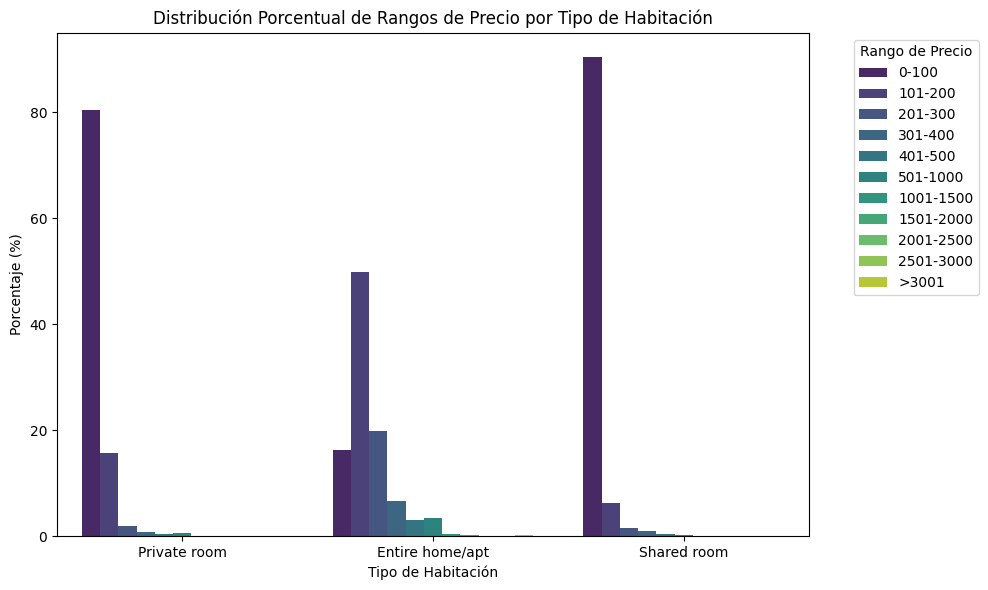

In [25]:
df['nombre_habitacion'] = df['number_tipohab'].map(mapa_habitaciones)

data_precio_habitacion = (df.groupby('number_tipohab')['rango_precio'].value_counts(normalize=True).mul(100).rename('porcentaje').reset_index())
data_precio_habitacion['nombre_habitacion'] = data_precio_habitacion['number_tipohab'].map(mapa_habitaciones)

plt.figure(figsize=(10, 6))
sns.barplot(data=data_precio_habitacion, 
            x='nombre_habitacion', 
            y='porcentaje', 
            hue='rango_precio',
            hue_order=labels, 
            palette='viridis')
plt.title('Distribución Porcentual de Rangos de Precio por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=0)
plt.legend(title='Rango de Precio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> Observaciones:
>
> Más del 80% de las habitaciones privadas y casi el 100% de las compartidas se situan en el rango de 0 a 100. 
>si buscamos alojarnos de la manera más económica tendríamos que optar por estas opciones.
>
> Los apartamentos enteros tienen una distribución de precios más variados, pero predomina precios más altos que en los otros dos tipos de alojamiento.


In [26]:
df

,price,minimum_nights,availability_365,number_barrio,number_tipohab,nombre_barrio,rango_precio,nombre_habitacion
0,149,1,365,0,0,Brooklyn,101-200,Private room
1,225,1,355,1,1,Manhattan,201-300,Entire home/apt
2,150,3,365,1,0,Manhattan,101-200,Private room
3,89,1,194,0,1,Brooklyn,0-100,Entire home/apt
5,200,3,129,1,1,Manhattan,101-200,Entire home/apt
...,...,...,...,...,...,...,...,...
48890,70,2,9,0,0,Brooklyn,0-100,Private room
48891,40,4,36,0,0,Brooklyn,0-100,Private room
48892,115,10,27,1,1,Manhattan,101-200,Entire home/apt
48893,55,1,2,1,2,Manhattan,0-100,Shared room


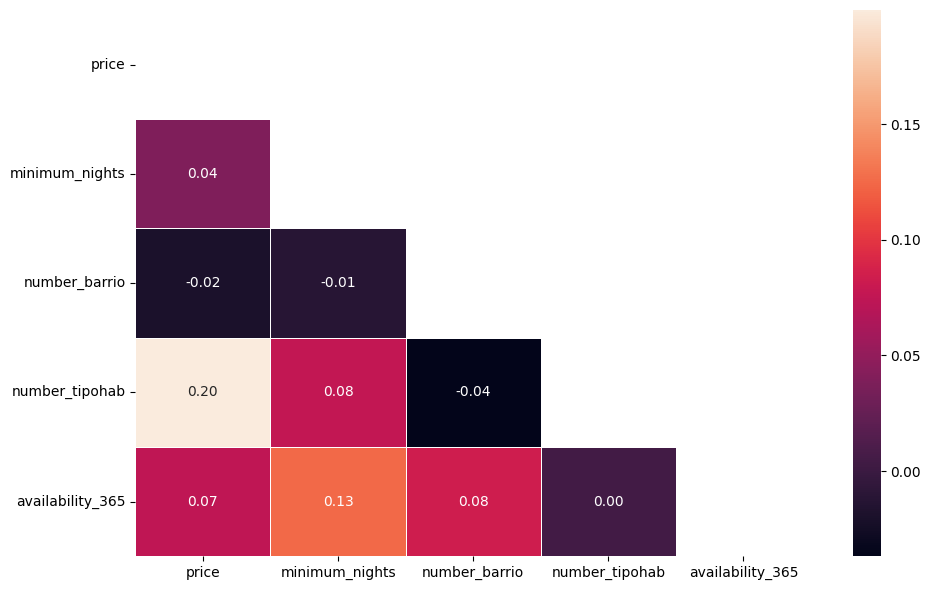

In [27]:
corr = df[["price", "minimum_nights", "number_barrio", "number_tipohab",'availability_365',]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

> Observaciones:
>
>El precio con el tipo de habitación está ligeramente correlacionado.
>
>En el siguiente gráfico confirmaremos lo visto anteriormente en el gráfico de barras. Que lo más ofertado son alquileres en el rango de precio de 0-100 en habitaciones privadas y compartidas. 

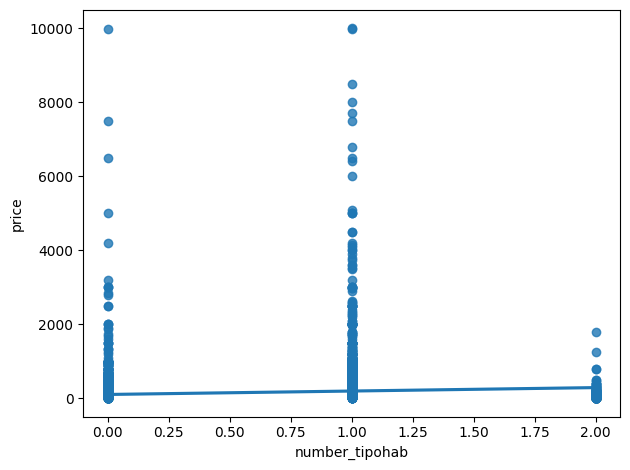

In [28]:
sns.regplot(data=df, x="number_tipohab", y="price")
plt.tight_layout()
plt.show()

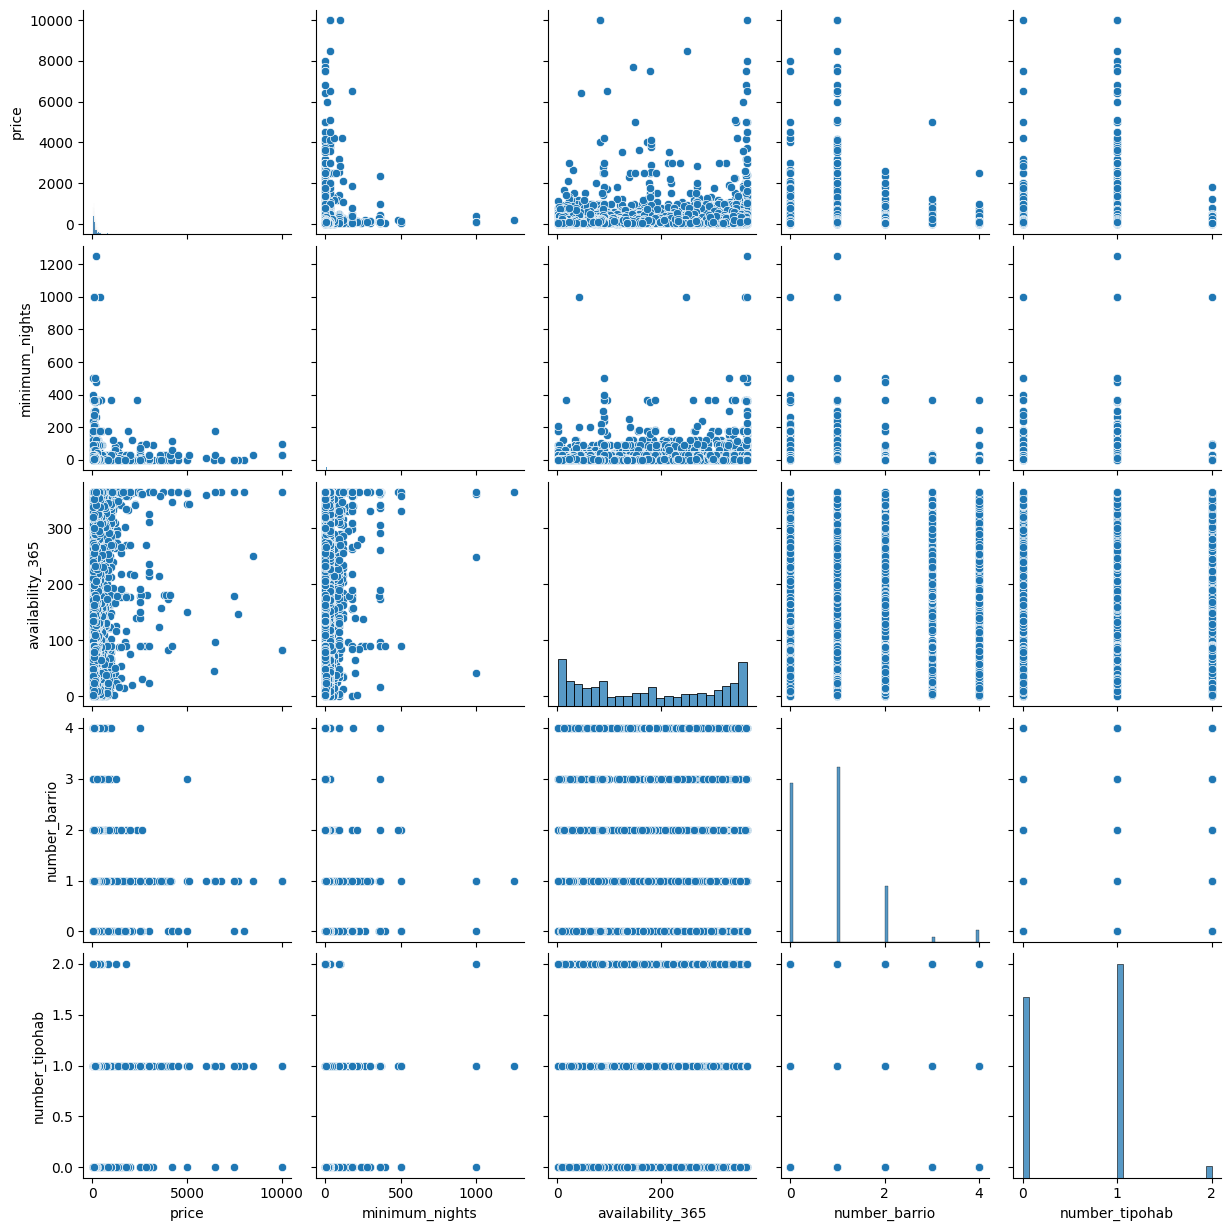

In [29]:
sns.pairplot(data=df)

## 7º Ingeniería de características.


In [30]:
df

,price,minimum_nights,availability_365,number_barrio,number_tipohab,nombre_barrio,rango_precio,nombre_habitacion
0,149,1,365,0,0,Brooklyn,101-200,Private room
1,225,1,355,1,1,Manhattan,201-300,Entire home/apt
2,150,3,365,1,0,Manhattan,101-200,Private room
3,89,1,194,0,1,Brooklyn,0-100,Entire home/apt
5,200,3,129,1,1,Manhattan,101-200,Entire home/apt
...,...,...,...,...,...,...,...,...
48890,70,2,9,0,0,Brooklyn,0-100,Private room
48891,40,4,36,0,0,Brooklyn,0-100,Private room
48892,115,10,27,1,1,Manhattan,101-200,Entire home/apt
48893,55,1,2,1,2,Manhattan,0-100,Shared room


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,31354.0,162.091822,254.444750,10.0,70.0,112.0,189.0,10000.0
minimum_nights,31354.0,8.338426,23.838961,1.0,2.0,3.0,5.0,1250.0
availability_365,31354.0,175.834439,126.195374,1.0,55.0,168.0,305.0,365.0
number_barrio,31354.0,0.854755,0.900613,0.0,0.0,1.0,1.0,4.0
number_tipohab,31354.0,0.582254,0.546103,0.0,0.0,1.0,1.0,2.0


Observaciones:
>
> Es raro que en la columna de minimum_night haya un max de 1250, cuando solo hay 365 días, por lo que me hace pensar que hay alquileres que tienen puesto esos datos para que no sean reservados.



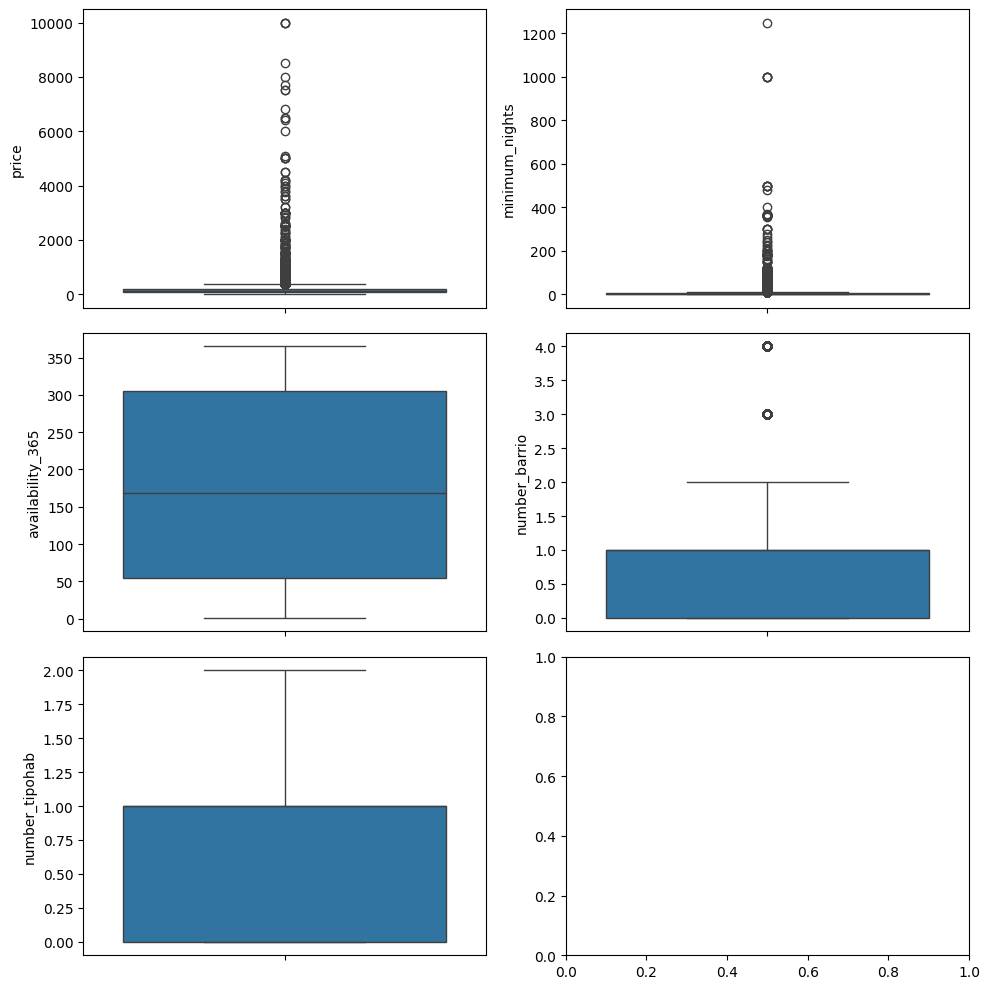

In [32]:
fig, axis = plt.subplots(3, 2, figsize=(10, 10))

sns.boxplot(ax=axis[0, 0], data=df, y="price")
sns.boxplot(ax=axis[0, 1], data=df, y="minimum_nights")
sns.boxplot(ax=axis[1, 0], data=df, y="availability_365")
sns.boxplot(ax=axis[1, 1], data=df, y="number_barrio")
sns.boxplot(ax=axis[2, 0], data=df, y="number_tipohab")

plt.tight_layout()
plt.show()

>Observaciones:
>
>En estos gráficos confirmamos que no es normal que aparezca esos punto en más de 1000 noches como minimo de noches a reservar.
>
>Abajo confirmamos que no es normal que haya dentro de minimo de noches 1250 como noches máximas.

In [33]:
night_stats = df["minimum_nights"].describe()
night_stats

count    31354.000000
mean         8.338426
std         23.838961
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [ ]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df["minimum_nights"].quantile(0.25)
q3 = df["minimum_nights"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 9.5, límite inferior: 0, rango intercuartílico: 3.0'

>### Ojo!
>Vamos a ver cuantos alquileres hay donde pidan un mínimo de noches de más de un año. Ya que esto no sería viable si la disponibilidad es inferior a 365 dias.

In [ ]:
df[df["minimum_nights"] > 365]

,price,minimum_nights,availability_365,number_barrio,number_tipohab,nombre_barrio,rango_precio,nombre_habitacion
1305,115,370,365,0,1,Brooklyn,101-200,Entire home/apt
2854,400,1000,362,1,1,Manhattan,301-400,Entire home/apt
5767,180,1250,365,1,1,Manhattan,101-200,Entire home/apt
7355,134,500,90,2,1,Queens,101-200,Entire home/apt
8014,75,500,362,1,1,Manhattan,0-100,Entire home/apt
10829,199,480,365,2,1,Queens,101-200,Entire home/apt
11193,50,500,365,0,0,Brooklyn,0-100,Private room
13404,99,999,42,1,1,Manhattan,0-100,Entire home/apt
14285,45,500,358,0,0,Brooklyn,0-100,Private room
15946,250,366,365,1,1,Manhattan,201-300,Entire home/apt


>Observaciones:
>
>Hay muchos alquileres que piden un minimo de noches para alquilar superior al año cuando tienen puesto en algunos casos que no estan disponibles durante todo el año.
>
>Por lo que hace pensar que son anuncios "inhabilitados" también como lo eran los de precio 0 o disponibilidad 0

> ### Valores Faltantes
> Comprobamos si tenemos en el df valores nulos o vacíos.

In [ ]:
df.isnull().sum() / df.shape[0]

price                0.0
minimum_nights       0.0
availability_365     0.0
number_barrio        0.0
number_tipohab       0.0
nombre_barrio        0.0
rango_precio         0.0
nombre_habitacion    0.0
dtype: float64

In [ ]:
df.isnull().sum().sort_values(ascending=False)

price                0
minimum_nights       0
availability_365     0
number_barrio        0
number_tipohab       0
nombre_barrio        0
rango_precio         0
nombre_habitacion    0
dtype: int64

> En esta ocasión a nuestro data frame no le falta ningun valor.

## 8º Split (dos metodos o enfoques).

>1º Vamos a limpiar de nuevo el código con lo visto anteriormente ya que la columna availability_365 representa la disponibilidad en los próximos 365 días (o sea, en un año).
>
>El valor máximo que puede tener availability_365 es 365.Por lo tanto, es imposible que una propiedad se alquile por 1000 noches si solo se mira su disponibilidad en el calendario del próximo año.
>
>El df del inicio es inválido porque exige un tiempo de alquiler que es físicamente imposible de cumplir en el periodo de tiempo medido por el dataset.

In [34]:
df_lim = df[df['minimum_nights'] <= df['availability_365']].copy()
df_lim

,price,minimum_nights,availability_365,number_barrio,number_tipohab,nombre_barrio,rango_precio,nombre_habitacion
0,149,1,365,0,0,Brooklyn,101-200,Private room
1,225,1,355,1,1,Manhattan,201-300,Entire home/apt
2,150,3,365,1,0,Manhattan,101-200,Private room
3,89,1,194,0,1,Brooklyn,0-100,Entire home/apt
5,200,3,129,1,1,Manhattan,101-200,Entire home/apt
...,...,...,...,...,...,...,...,...
48890,70,2,9,0,0,Brooklyn,0-100,Private room
48891,40,4,36,0,0,Brooklyn,0-100,Private room
48892,115,10,27,1,1,Manhattan,101-200,Entire home/apt
48893,55,1,2,1,2,Manhattan,0-100,Shared room


> Realizamos el split

In [37]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("price", axis=1)
y = df["price"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [38]:
X_train

,minimum_nights,availability_365,number_barrio,number_tipohab,nombre_barrio,rango_precio,nombre_habitacion
47746,3,291,1,1,Manhattan,101-200,Entire home/apt
38977,2,122,0,1,Brooklyn,101-200,Entire home/apt
34930,2,125,2,0,Queens,0-100,Private room
13453,1,324,2,1,Queens,101-200,Entire home/apt
48627,3,169,4,1,Bronx,0-100,Entire home/apt
...,...,...,...,...,...,...,...
2251,30,26,0,1,Brooklyn,0-100,Entire home/apt
3976,2,264,0,1,Brooklyn,101-200,Entire home/apt
42895,7,174,2,1,Queens,201-300,Entire home/apt
46447,2,55,1,1,Manhattan,201-300,Entire home/apt


In [39]:
X_train.columns

Index(['minimum_nights', 'availability_365', 'number_barrio', 'number_tipohab',
       'nombre_barrio', 'rango_precio', 'nombre_habitacion'],
      dtype='object')

In [40]:
X_train.head()

,minimum_nights,availability_365,number_barrio,number_tipohab,nombre_barrio,rango_precio,nombre_habitacion
47746,3,291,1,1,Manhattan,101-200,Entire home/apt
38977,2,122,0,1,Brooklyn,101-200,Entire home/apt
34930,2,125,2,0,Queens,0-100,Private room
13453,1,324,2,1,Queens,101-200,Entire home/apt
48627,3,169,4,1,Bronx,0-100,Entire home/apt



## 9º Scaling y Encoding.

> ### Scaling, Normalización

In [ ]:
norm_scaler = StandardScaler() 

num_variables = ["price", "minimum_nights", "availability_365", "number_barrio", "number_tipohab"]
norm_features = norm_scaler.fit_transform(df_lim[num_variables])

df_norm = pd.DataFrame(norm_features,
                       index=df_lim.index,
                       columns=num_variables)
df_norm.head()

,price,minimum_nights,availability_365,number_barrio,number_tipohab
0,-0.053458,-0.42376,1.481478,-0.949798,-1.057852
1,0.249601,-0.42376,1.401333,0.155547,0.769146
2,-0.049471,-0.29435,1.481478,0.155547,-1.057852
3,-0.292716,-0.42376,0.110996,-0.949798,0.769146
5,0.149910,-0.29435,-0.409947,0.155547,0.769146


In [42]:
df_norm

,price,minimum_nights,availability_365,number_barrio,number_tipohab
0,-0.053458,-0.423760,1.481478,-0.949798,-1.057852
1,0.249601,-0.423760,1.401333,0.155547,0.769146
2,-0.049471,-0.294350,1.481478,0.155547,-1.057852
3,-0.292716,-0.423760,0.110996,-0.949798,0.769146
5,0.149910,-0.294350,-0.409947,0.155547,0.769146
...,...,...,...,...,...
48890,-0.368480,-0.359055,-1.371689,-0.949798,-1.057852
48891,-0.488109,-0.229645,-1.155297,-0.949798,-1.057852
48892,-0.189037,0.158586,-1.227427,0.155547,0.769146
48893,-0.428295,-0.423760,-1.427790,0.155547,2.596144


> ### Escalado Mínimo-Máximo

In [44]:

min_max_scaler = MinMaxScaler()

num_variables = ["price", "minimum_nights", "availability_365", "number_barrio", "number_tipohab"]
min_max_features = min_max_scaler.fit_transform(df_lim[num_variables])

df_min_max = pd.DataFrame(min_max_features,
                          index=df_lim.index,
                          columns=num_variables)
df_min_max

,price,minimum_nights,availability_365,number_barrio,number_tipohab
0,0.013914,0.000000,1.000000,0.00,0.0
1,0.021522,0.000000,0.972527,0.25,0.5
2,0.014014,0.005495,1.000000,0.25,0.0
3,0.007908,0.000000,0.530220,0.00,0.5
5,0.019019,0.005495,0.351648,0.25,0.5
...,...,...,...,...,...
48890,0.006006,0.002747,0.021978,0.00,0.0
48891,0.003003,0.008242,0.096154,0.00,0.0
48892,0.010511,0.024725,0.071429,0.25,0.5
48893,0.004505,0.000000,0.002747,0.25,1.0


In [45]:
df_min_max.columns

Index(['price', 'minimum_nights', 'availability_365', 'number_barrio',
       'number_tipohab'],
      dtype='object')

> ### Encoding - Codificación de Variables Categóricas.
>
> Esto ya lo hemos realizado en el paso de limpieza y preparacion de datos con factorize y drop. Como a lo largo del proyecto hemos añadido 3 columnas más. Elimino esas columnas para tener de vuelta todo el DataFrame númerico.

In [50]:
df_final = df_lim.drop(['nombre_barrio', 'rango_precio', 'nombre_habitacion'], axis=1)
df_final

,price,minimum_nights,availability_365,number_barrio,number_tipohab
0,149,1,365,0,0
1,225,1,355,1,1
2,150,3,365,1,0
3,89,1,194,0,1
5,200,3,129,1,1
...,...,...,...,...,...
48890,70,2,9,0,0
48891,40,4,36,0,0
48892,115,10,27,1,1
48893,55,1,2,1,2


In [55]:
data = {'Size': ['Pequeño', 'Mediano', 'Grande', 'Mediano', 'Pequeño',
                 'Mediano', 'Grande', 'Mediano', 'Pequeño', 'Grande',
                 'Mediano', 'Pequeño']}
df_example = pd.DataFrame(data)
df_example

,Size
0,Pequeño
1,Mediano
2,Grande
3,Mediano
4,Pequeño
5,Mediano
6,Grande
7,Mediano
8,Pequeño
9,Grande


In [56]:
# Creamos la instancia del encoder, definiendo el orden de las categorías
ordinal_encoder = OrdinalEncoder(categories=[['Pequeño', 'Mediano', 'Grande']])

df_example['Ordinal_Size'] = ordinal_encoder.fit_transform(df_example[['Size']])

df_example

,Size,Ordinal_Size
0,Pequeño,0.0
1,Mediano,1.0
2,Grande,2.0
3,Mediano,1.0
4,Pequeño,0.0
5,Mediano,1.0
6,Grande,2.0
7,Mediano,1.0
8,Pequeño,0.0
9,Grande,2.0


In [59]:
# Guardamos utilizando Pickle (que nos permite guardar objetos de Python)
with open('../models/airbnb-one-hot-encoder.pkl', 'wb') as file:
    pickle.dump(airbnb-one-hot-encoder, file)


NameError: name 'airbnb' is not defined